In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from matplotlib import pyplot as plt
import scipy
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from collections import Counter
from imblearn.combine import SMOTEENN
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest


In [2]:
# Importing the Datasets
df =pd.read_csv(r'../Datasets/WA_Fn-UseC_-Telco-Customer-Churn.xls')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [8]:
df[df.duplicated()].shape[0]   # checks for Duplicate data (records) in each row

0

In [9]:
df[df.duplicated()].shape[1]  # checks for duplicate data in  each columns

21

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.drop('customerID', axis=1, inplace=True)  # Delete the CustomerID column from the datasets

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce') # Since total charges is having numnerical values but dtype is object

In [14]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Exploratory Data Analysis 

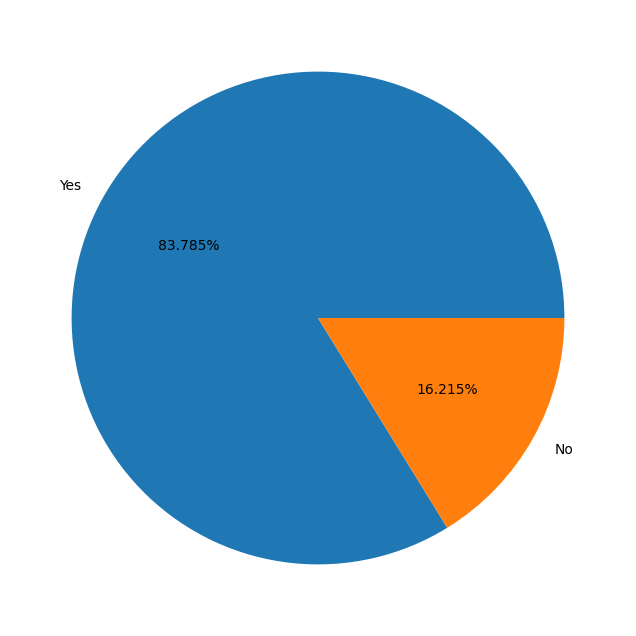

In [16]:
#Pie Chart to count Senior Citizen
plt.figure(figsize=(10,8))
plt.pie(df['SeniorCitizen'].value_counts(), autopct="%.3f%%", labels=['Yes', 'No'])
plt.show()

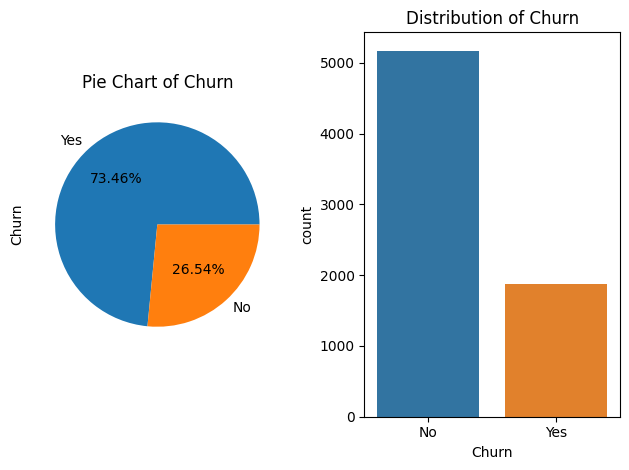

In [44]:
#Check the distribution of churn Class
plt.subplot(1,2,2) #the figure has 1 row, 2 columns, and this plot is the second plot.
sns.countplot(data=df, x="Churn")
plt.title("Distribution of Churn")
plt.subplot(1,2,1)  #the figure has 1 row, 2 columns, and this plot is the first plot.
df['Churn'].value_counts().plot(kind="pie",autopct='%1.2f%%', labels=['Yes','No'])
plt.title('Pie Chart of Churn')
plt.tight_layout()
plt.show()

In [43]:
# Percentage of each class sample distribution
print("Customer Churn : {}%".format(np.round(len(df[df['Churn']=='Yes'])/len(df)*100)))
print("Customer Not Churn : {}%".format(np.round(len(df[df['Churn']=='No'])/len(df)*100)))

Customer Churn : 27.0%
Customer Not Churn : 73.0%


Since Our Dataset is highly imbalance we need to balance it before fitting into model

In [53]:
# Calculation of loss because of customer churn
churn_customers=df[df["Churn"]=="Yes"]
loss=churn_customers["TotalCharges"].sum()
total_revenue=df["TotalCharges"].sum()
print("We have lost around {}$ due to customer Churn".format(loss))
print("We have lost around {} prcentage of revenue due to customer churn".format(loss/total_revenue*100))

We have lost around 2862926.9$ due to customer Churn
We have lost around 17.830697680698883 prcentage of revenue due to customer churn


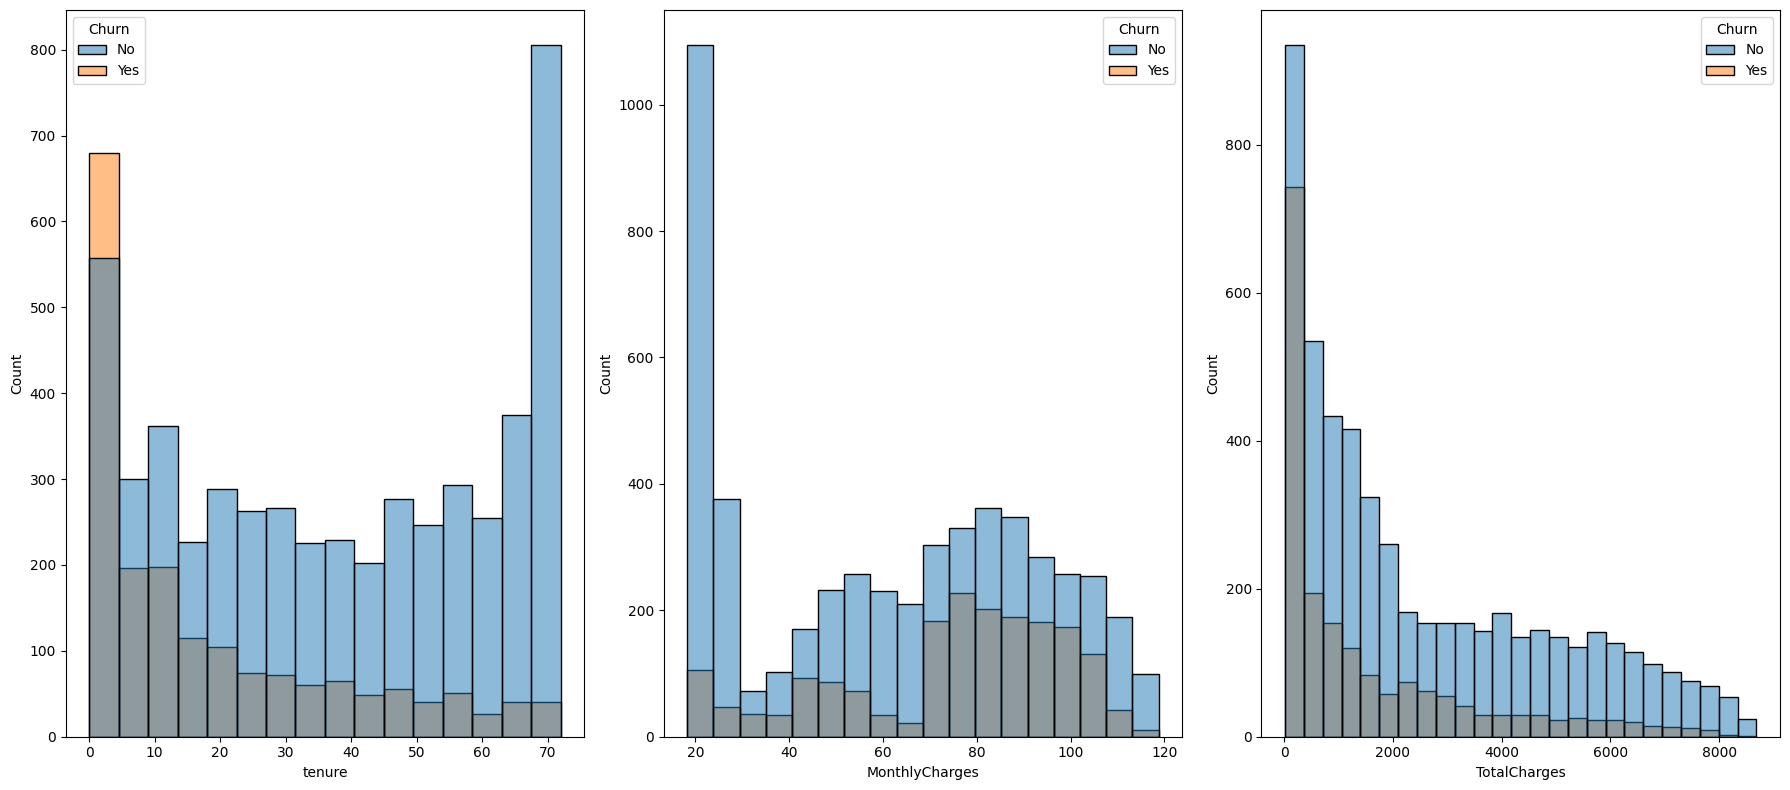

In [54]:
#Plotting Numerical Features with histogram
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
axes=ax.flatten()
num_columns=['tenure','MonthlyCharges','TotalCharges']
for i,col in enumerate(num_columns):
    if(col!='SeniorCitizen'):
        sns.histplot(x=col,data=df,hue='Churn', ax=axes[i])
fig.tight_layout()
plt.show()

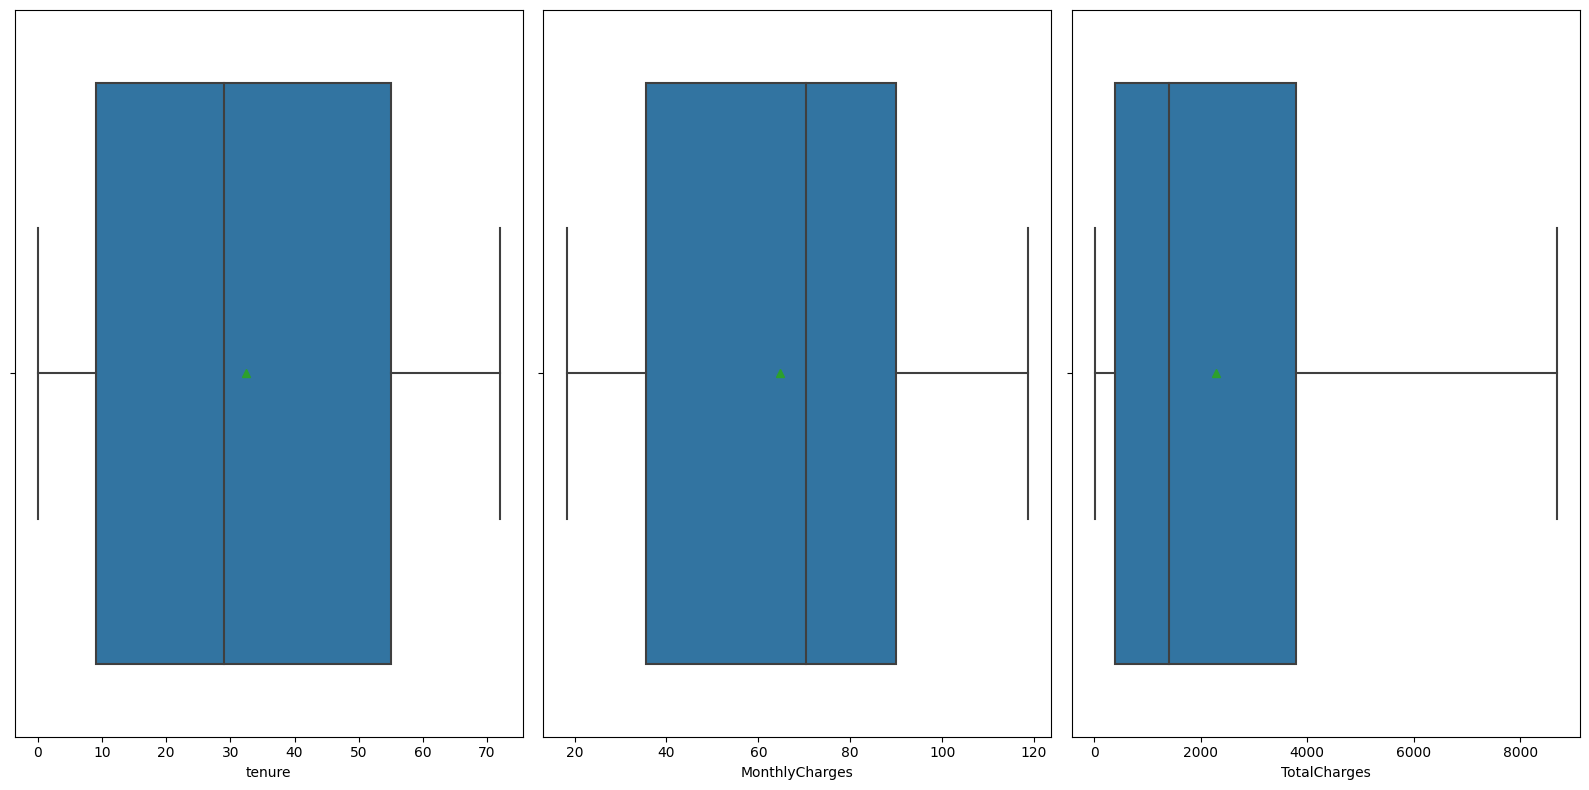

In [58]:
# Plotting Numerical features with boxplot
fig,ax=plt.subplots(nrows=1,ncols=3, figsize=(16,8))
axes=ax.flatten()
num_columns=['tenure','MonthlyCharges','TotalCharges']
for i,col in enumerate(num_columns):
    if(col!="SeniorCitizen"):
        sns.boxplot(x=col,data=df,showmeans=True,ax=axes[i])
fig.tight_layout()
plt.show()

After plotting histogram and Boxplot, We found that there is no outlier present in Numerical Dataset. So, we don't need any kind of Outlier Treatment

### Univariate Analysis 

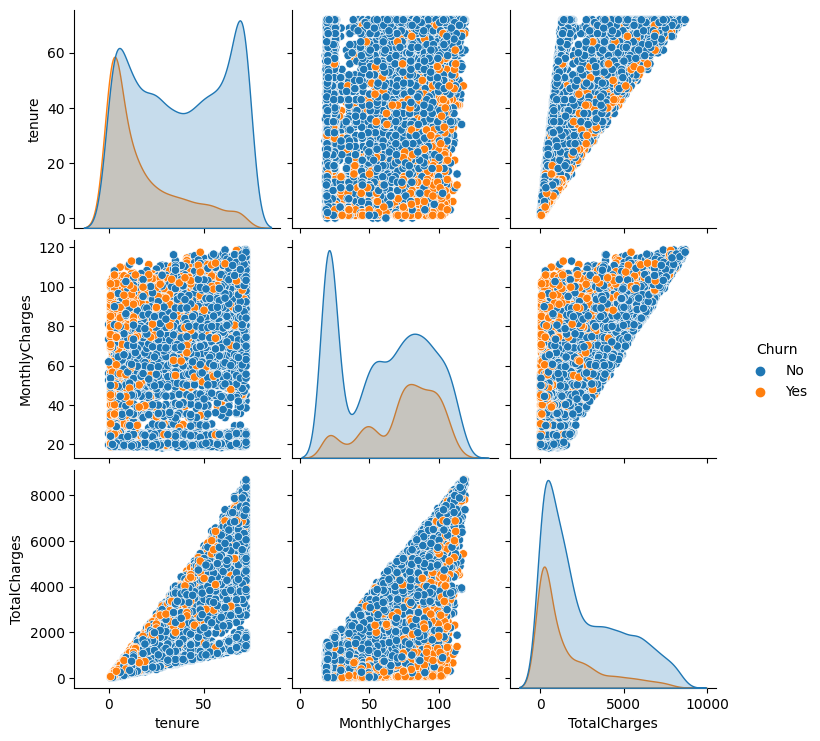

In [65]:
sns.pairplot(df.drop(columns='SeniorCitizen'),hue='Churn', kind='scatter')
plt.show()

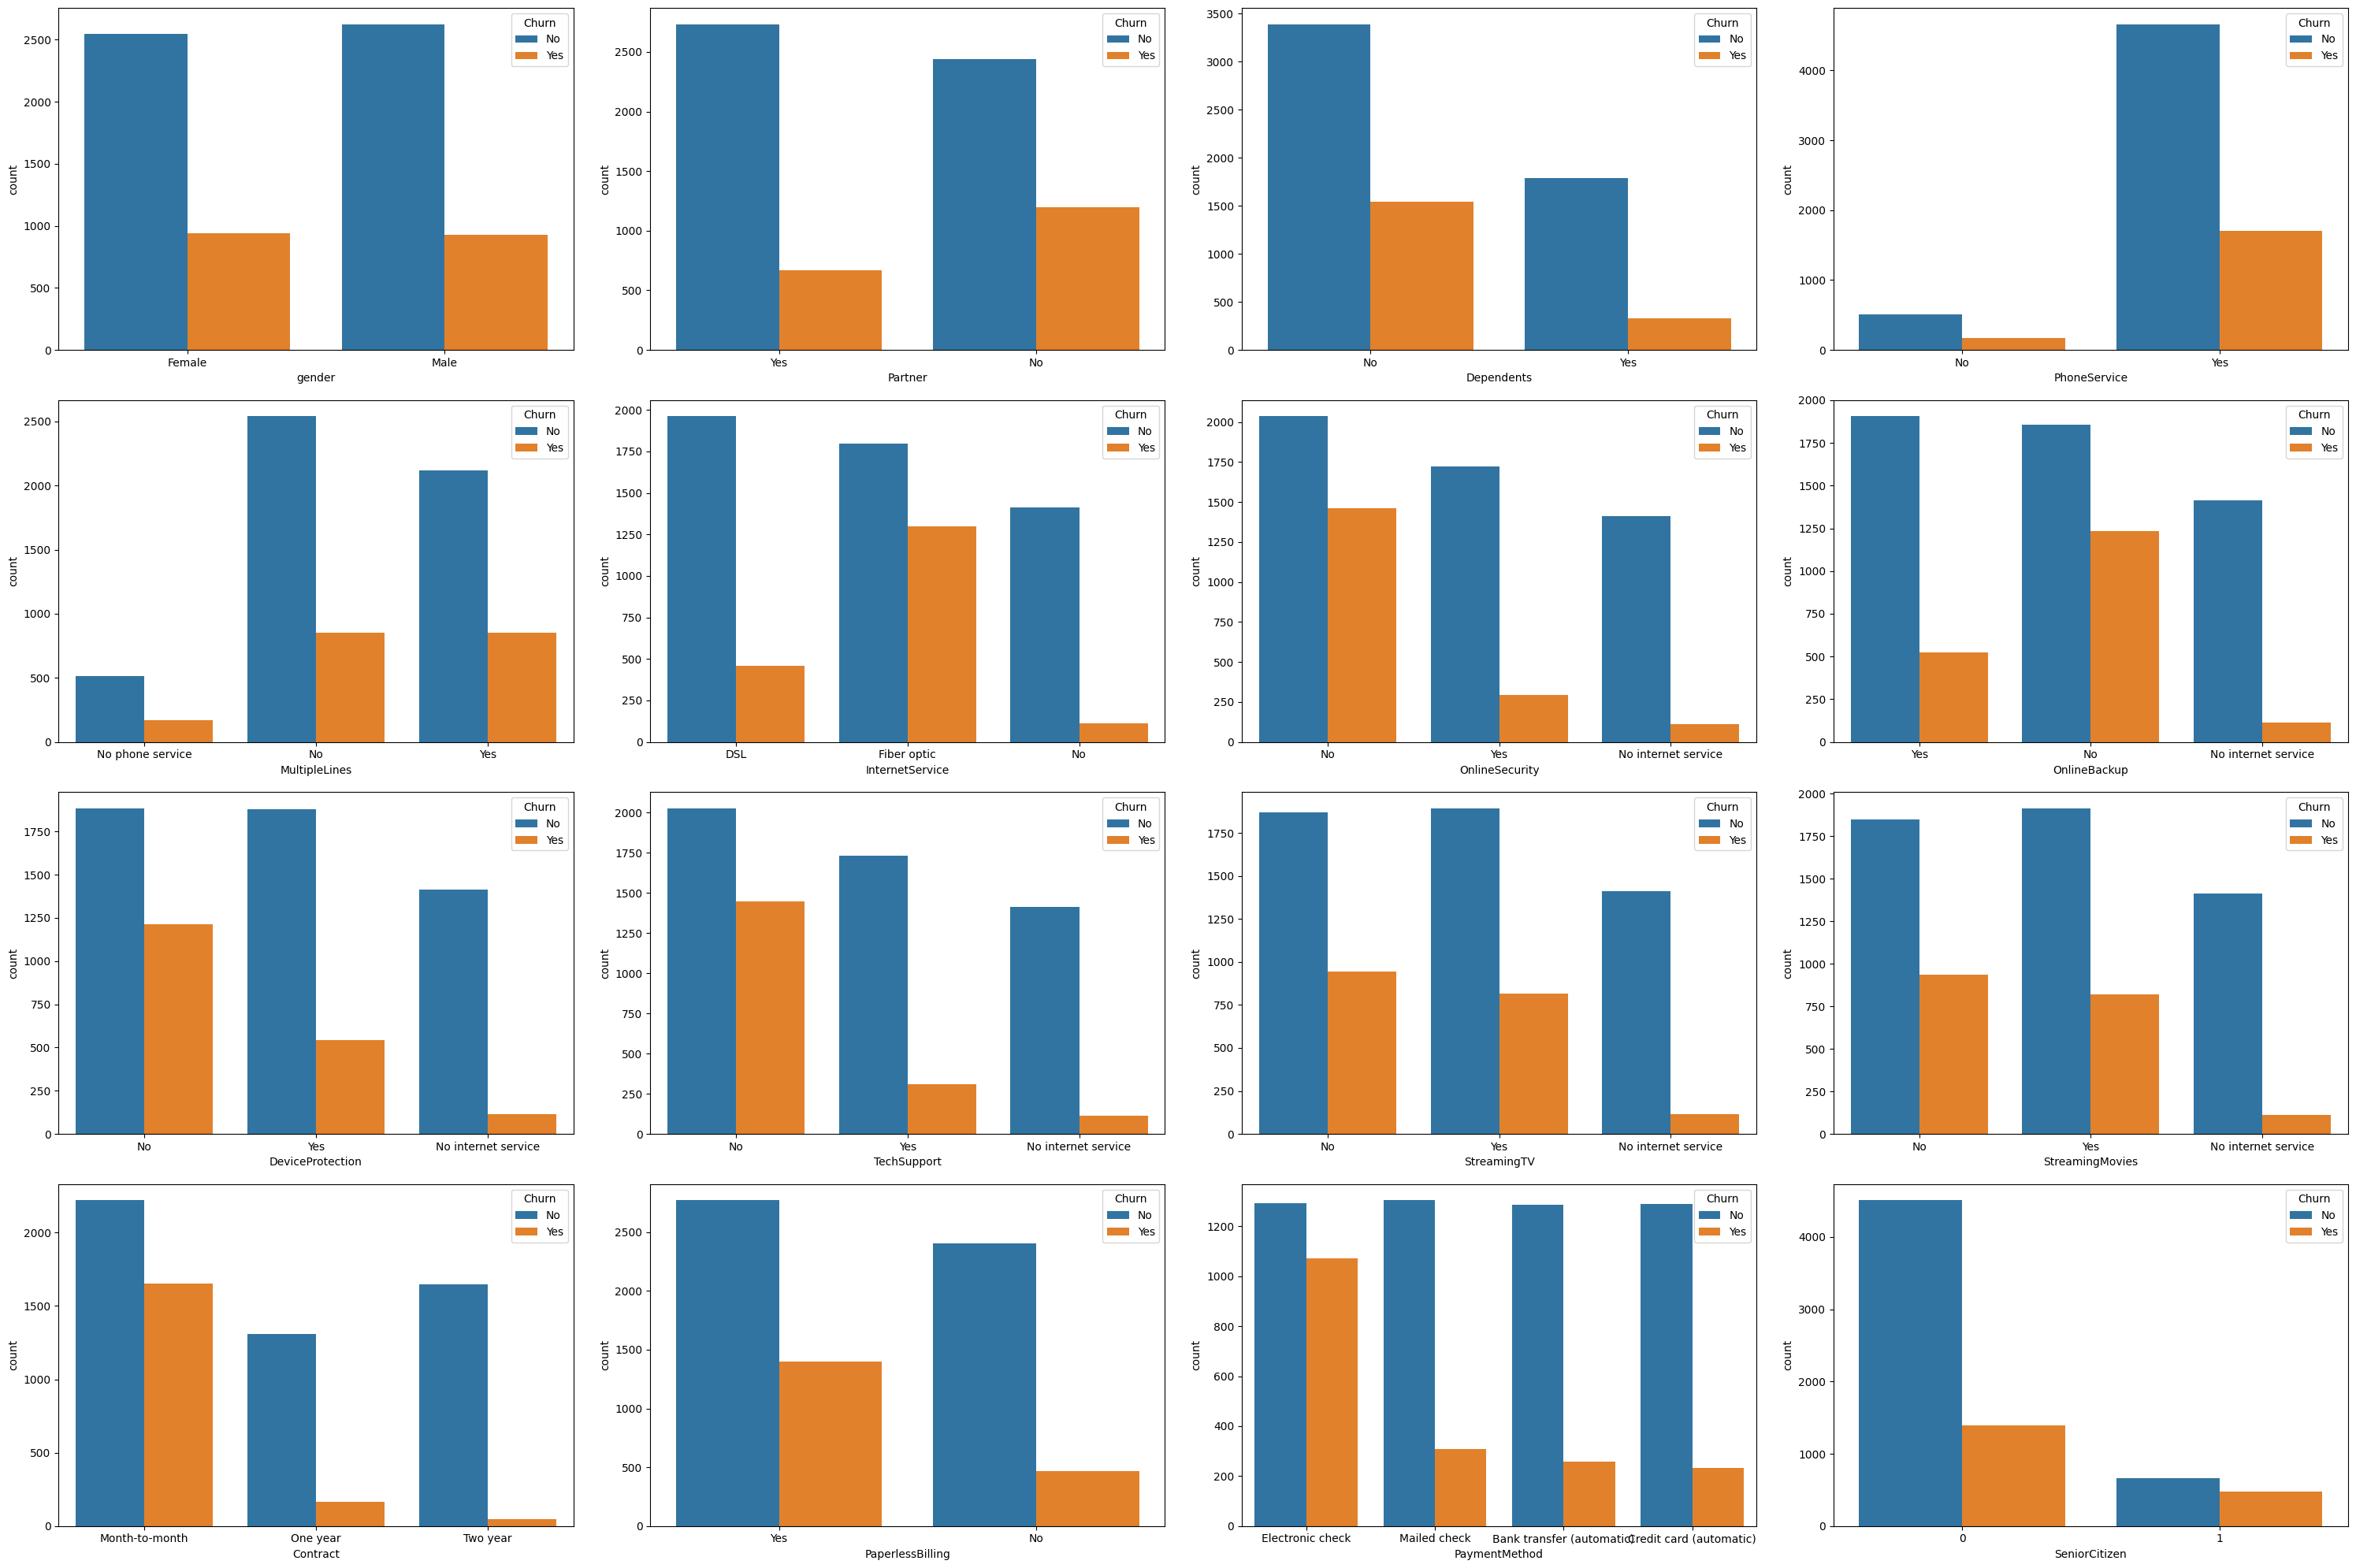

In [82]:
# Plot categorical Features
cat_features=list(df.select_dtypes(include='object').columns)
cat_features.remove('Churn')
cat_features.append('SeniorCitizen')

fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(30,20))
axes=ax.flatten()
for i,col in enumerate(cat_features):
    sns.countplot(x=col,hue='Churn', data=df,ax=axes[i])
    
#Adjust Spacing between subplots
fig.tight_layout()
plt.show()

### Data Cleaning 

In [83]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
# Check for null Values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [85]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [86]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [87]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
df.isnull().sum().sum()

0

In [89]:
# Encoding Categorical Values inot numeric using label encoder
encoder=LabelEncoder()
for feature in df.select_dtypes(include='object').columns:
    df[feature]=encoder.fit_transform(df[feature])

In [90]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [92]:
df.shape

(7043, 20)

In [94]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

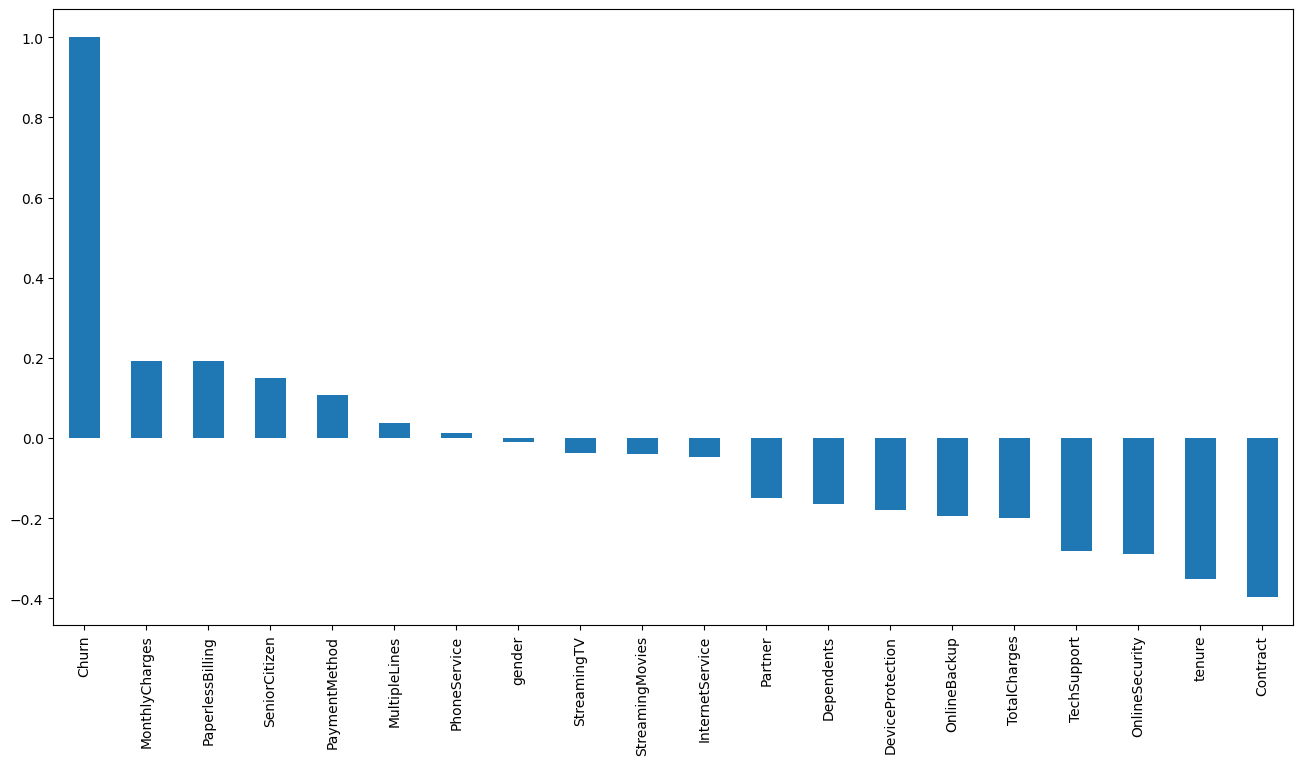

In [95]:
# Get Correlation of Churn with other Variables
plt.figure(figsize=(16,8))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

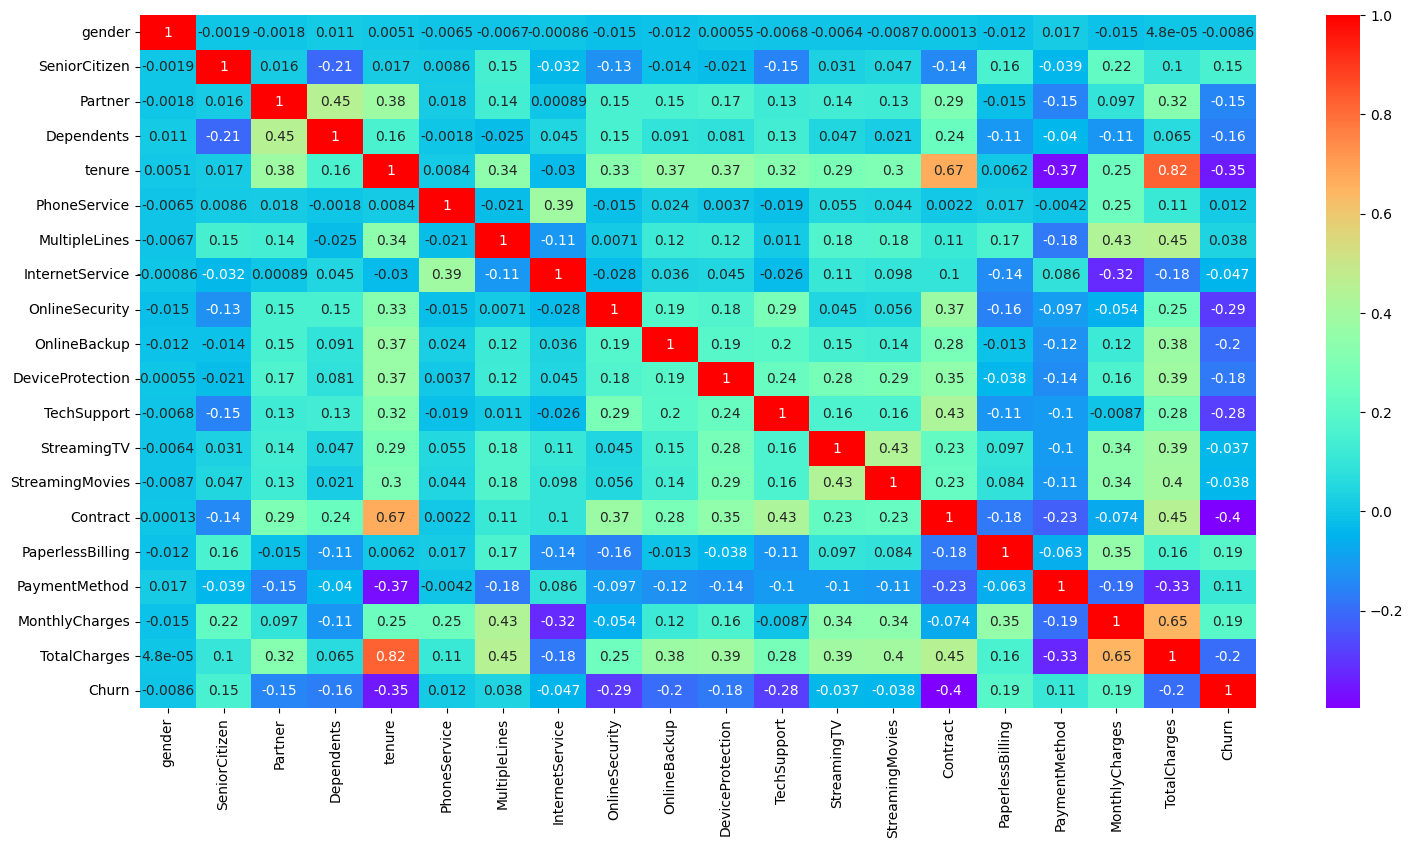

In [96]:
# Correlation of Features using heatmap
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True, cmap='rainbow')
plt.show()

Since We are using ensamble methods for model building so there is no need of feature scaling as its prediction is based on creating multiple decision tree

In [97]:
# Separating independent variable and target variable
X=df.drop("Churn", axis=1)
y=df["Churn"]

In [98]:
X.shape

(7043, 19)

### Feature Selection
Selecting only 10 features which has higher correlation with Churn

In [102]:
select_feature=SelectKBest(k=10)  # no of features to be select
select_feature.fit(X,y)

SelectKBest()

In [103]:
# Top 10 high correlated Features
select_feature.get_feature_names_out()

array(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [104]:
X.shape

(7043, 19)

According to the features selection we have selected 10 top features out of 19 features and Now splitting data into Training and Testing set in 80:20 ratio

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [107]:
# Imbalnce datasets
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [123]:
def evaluate_model_Performance(model,test_data):
    prediction=model.predict(test_data)
    print("Training Accuracy:",model.score(X_train,y_train))
    print("Validation Accuracy: {.2f}", format(accuracy_score(y_test,prediction)))
    print("Precision Score: {.2f}", format(precision_score(y_test,prediction)))
    print("Recall Score: {.2f}", format(recall_score(y_test,prediction)))
    print("f1 Score: {.2f}", format(f1_score(y_test,prediction)))
    print(classification_report(y_test,prediction))


    

In [124]:
# Random Forest model without Balancing dataset and without tuning hyperparameter
rand_forest=RandomForestClassifier()
rand_forest.fit(X_train,y_train)

RandomForestClassifier()

In [125]:
# Measure the Performance of Random forest Model
evaluate_model_Performance(rand_forest,X_test)

Training Accuracy: 0.9978700745473909
Validation Accuracy: {.2f} 0.7934705464868701
Precision Score: {.2f} 0.6621160409556314
Recall Score: {.2f} 0.5025906735751295
f1 Score: {.2f} 0.5714285714285714
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1023
           1       0.66      0.50      0.57       386

    accuracy                           0.79      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [127]:
# GradientBoostingClassifier without balancing dataset and without hyperparameter tuning
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [128]:
# Measure the performance of gradientBoostingClassifier
evaluate_model_Performance(gbc,X_test)

Training Accuracy: 0.8288959886403976
Validation Accuracy: {.2f} 0.8019872249822569
Precision Score: {.2f} 0.6877192982456141
Recall Score: {.2f} 0.5077720207253886
f1 Score: {.2f} 0.5842026825633384
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1023
           1       0.69      0.51      0.58       386

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



As we can see our model is not performing upto the mark because of imbalance nature of dataset so we will balance it to reduce TN, FN and increase FP,TP

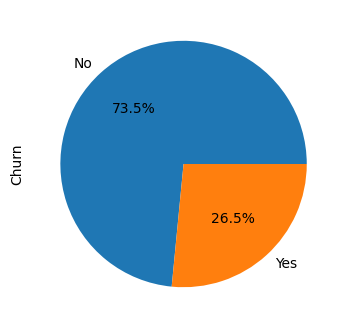

In [133]:
plt.figure(figsize=(8,4))
y.value_counts().plot(kind='pie',autopct='%.1f%%', labels=['No','Yes'])
plt.show()

Here, We have 2 classes class 0 and class 1. class 0 is majority class and class 1 is minority class

In [134]:
smote=SMOTEENN()
X_st,y_st=smote.fit_resample(X,y)

Text(0.5, 1.0, 'Target Class Distribution after under Sampling')

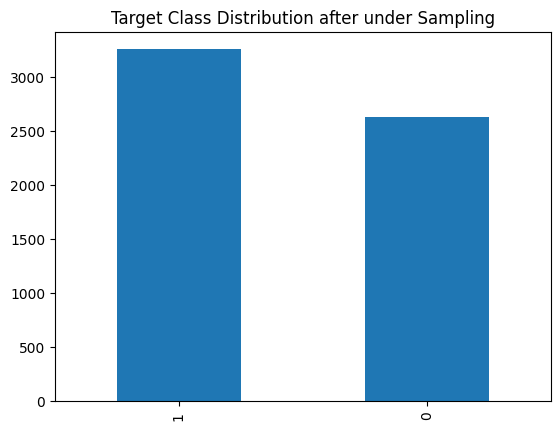

In [135]:
y_st.value_counts().plot(kind='bar')
plt.title("Target Class Distribution after under Sampling")

In [136]:
y_st.value_counts()

1    3256
0    2635
Name: Churn, dtype: int64

Since we have performed SMOTEENN (Combination of Smote + ENN) sampling method and we can see our dataset is nearly balanced

In [137]:
# Now, splitting Training and testing Dataset using balanced dataset
X_train,X_test,y_train,y_test=train_test_split(X_st,y_st,test_size=0.2,random_state=55)

In [138]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4712, 19), (1179, 19), (4712,), (1179,))

Building Model with Balanced Dataset and Performance hyper parameter tuning using RandomSearchCv

In [139]:
paramgrid={
    'n_estimators':[40,60,80,100,120,160,200],
    'max_depth':[2,4,6,8,10],
    'criterion':['gini'],
    'random_state':[27,42,45]
}

random_search_cv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=paramgrid)
random_search_cv.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [40, 60, 80, 100, 120,
                                                         160, 200],
                                        'random_state': [27, 42, 45]})

In [140]:
random_search_cv.best_params_

{'random_state': 42, 'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}

In [141]:
#Get final model with best param from RandomizedSearchCV
rf_final_model=random_search_cv.best_estimator_

In [142]:
#Evaluate RandomForestClassifier
evaluate_model_Performance(rf_final_model,X_test)

Training Accuracy: 0.9847198641765704
Validation Accuracy: {.2f} 0.9541984732824428
Precision Score: {.2f} 0.93993993993994
Recall Score: {.2f} 0.978125
f1 Score: {.2f} 0.9586523736600306
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       539
           1       0.94      0.98      0.96       640

    accuracy                           0.95      1179
   macro avg       0.96      0.95      0.95      1179
weighted avg       0.95      0.95      0.95      1179



In [143]:
paramgrid2={
    'n_estimators':[100,150,200,250,300],
    'criterion':['friedman_mse','squared_error','mse','mae'],
    'max_depth':[2,4,6,8,10],
    'loss':['deviance','exponential']
}


In [145]:
randomsearchcv2=RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),param_distributions=paramgrid2)

In [148]:
randomsearchcv2.fit(X_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]})

In [149]:
randomsearchcv2.best_params_

{'n_estimators': 300,
 'max_depth': 6,
 'loss': 'exponential',
 'criterion': 'friedman_mse'}

In [150]:
gb_final_model=randomsearchcv2.best_estimator_

In [151]:
# Evaluate Final GradientBoostingClassifier Performance
evaluate_model_Performance(gb_final_model,X_test)

Training Accuracy: 1.0
Validation Accuracy: {.2f} 0.9567430025445293
Precision Score: {.2f} 0.9455370650529501
Recall Score: {.2f} 0.9765625
f1 Score: {.2f} 0.9607993850883936
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       539
           1       0.95      0.98      0.96       640

    accuracy                           0.96      1179
   macro avg       0.96      0.95      0.96      1179
weighted avg       0.96      0.96      0.96      1179



Now, Save the final model integration with application

In [153]:
file=open("Telecom_customer_churn_Trained_model.pkl",'wb')
pickle.dump(gb_final_model,file)
file.close()